In [1]:
import pandas as pd

FILE_PATH = 'dados.csv'

df = pd.read_csv(FILE_PATH)
df.head(2)

C:\Users\jeanl\AppData\Local\Temp\ipykernel_2220\917769464.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790


In [2]:
df_students = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                                   'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                                   'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                           index = ['Math', 'Portuguese', 'English', 'Geography', 'History', 'Physics', 'Chemistry'])
df_students.rename_axis('Subjects', axis='columns', inplace=True)
df_students

Subjects,Fulano,Beltrano,Sicrano
Math,8,10.0,7.5
Portuguese,10,2.0,8.0
English,4,0.5,7.0
Geography,8,1.0,8.0
History,6,3.0,8.0
Physics,10,9.5,8.5
Chemistry,8,10.0,7.0


In [3]:
df_fulano = df_students['Fulano']
df_fulano

Math           8
Portuguese    10
English        4
Geography      8
History        6
Physics       10
Chemistry      8
Name: Fulano, dtype: int64

In [4]:
df_fulano = df_students[['Fulano']]
df_fulano

Subjects,Fulano
Math,8
Portuguese,10
English,4
Geography,8
History,6
Physics,10
Chemistry,8


In [5]:
fulano_mean = df_fulano.mean()[0]
fulano_mean

C:\Users\jeanl\AppData\Local\Temp\ipykernel_2220\1901517938.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fulano_mean = df_fulano.mean()[0]


7.714285714285714

In [6]:
df_fulano['Desvio'] = df_fulano['Fulano'] - fulano_mean
df_fulano

C:\Users\jeanl\AppData\Local\Temp\ipykernel_2220\2634227176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fulano['Desvio'] = df_fulano['Fulano'] - fulano_mean


Subjects,Fulano,Desvio
Math,8,0.285714
Portuguese,10,2.285714
English,4,-3.714286
Geography,8,0.285714
History,6,-1.714286
Physics,10,2.285714
Chemistry,8,0.285714


In [7]:
df_fulano['|Desvio|'] = df_fulano['Desvio'].abs()
df_fulano

Subjects,Fulano,Desvio,|Desvio|
Math,8,0.285714,0.285714
Portuguese,10,2.285714,2.285714
English,4,-3.714286,3.714286
Geography,8,0.285714,0.285714
History,6,-1.714286,1.714286
Physics,10,2.285714,2.285714
Chemistry,8,0.285714,0.285714


C:\Users\jeanl\AppData\Local\Temp\ipykernel_2220\3611809413.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.vlines(x=i, ymin=fulano_mean, ymax=df_fulano['Fulano'][i], linestyles='dashed')


<Axes: >

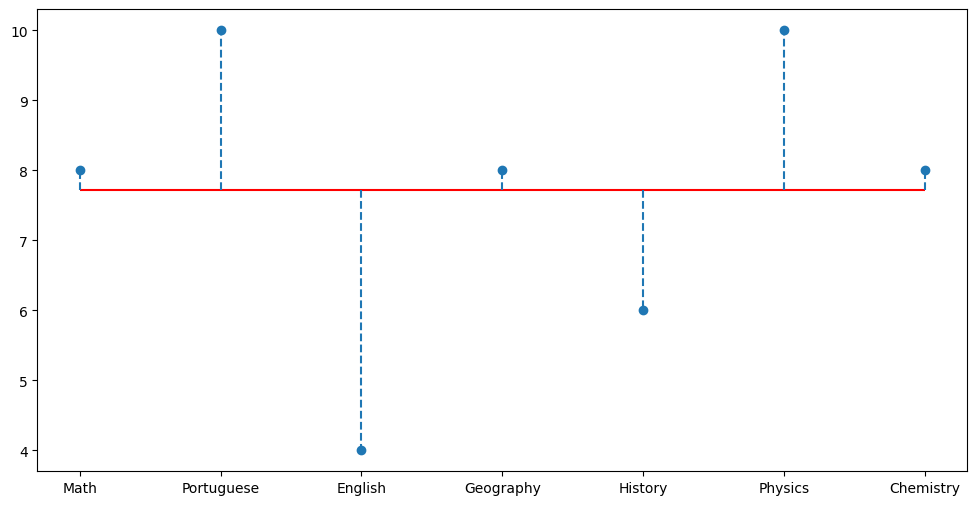

In [8]:
ax = df_fulano['Fulano'].plot(style='o')
ax.figure.set_size_inches(12, 6)
ax.hlines(y=fulano_mean, xmin=0, xmax=df_fulano.shape[0] - 1, colors='red')
for i in range(df_fulano.shape[0]):
  ax.vlines(x=i, ymin=fulano_mean, ymax=df_fulano['Fulano'][i], linestyles='dashed')
ax

In [9]:
df_fulano['|Desvio|'].mean()

1.5510204081632648

In [10]:
median_absolute_deviation = abs(df_fulano['Fulano'] - df_fulano['Fulano'].mean()).mean()
median_absolute_deviation

1.5510204081632648

In [11]:
df_fulano['Desvio²'] = df_fulano['Desvio'].pow(2)
df_fulano

Subjects,Fulano,Desvio,|Desvio|,Desvio²
Math,8,0.285714,0.285714,0.081633
Portuguese,10,2.285714,2.285714,5.224490
English,4,-3.714286,3.714286,13.795918
Geography,8,0.285714,0.285714,0.081633
History,6,-1.714286,1.714286,2.938776
Physics,10,2.285714,2.285714,5.224490
Chemistry,8,0.285714,0.285714,0.081633


In [12]:
df_fulano['Desvio²'].sum() / (len(df_fulano) - 1)

4.57142857142857

In [14]:
variance = df_fulano['Fulano'].var()
variance

4.57142857142857

In [15]:
import numpy as np

np.sqrt(variance)

2.1380899352993947

In [17]:
std_dev = df_fulano['Fulano'].std()
std_dev

2.1380899352993947

In [19]:
df_students.mean()

Subjects
Fulano      7.714286
Beltrano    5.142857
Sicrano     7.714286
dtype: float64

In [20]:
df_students.median()

Subjects
Fulano      8.0
Beltrano    3.0
Sicrano     8.0
dtype: float64

In [21]:
df_students.mode()

Subjects,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [25]:
df_students.std()

Subjects
Fulano      2.138090
Beltrano    4.460141
Sicrano     0.566947
dtype: float64

In [35]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

# Only 'M' std_dev
dataset.query('Sexo == "M"')['Idade'].std()

16.64531966249572